<img src='http://hilpisch.com/taim_logo.png' width="350px" align="right">

# Artificial Intelligence in Finance

## Machine Learning

Dr Yves J Hilpisch | The AI Machine

http://aimachine.io | http://twitter.com/dyjh

## Learning

<blockquote>"A computer program is said to learn from experience 𝐸 with respect to some class of tasks 𝑇 and performance measure 𝑃, if its performance at tasks in 𝑇, as measured by 𝑃, improves with experience 𝐸." — Mitchell (1997)</blockquote>


## Data

In [5]:
import numpy as np
import pandas as pd
from pylab import plt, mpl
np.random.seed(100)
plt.style.use('seaborn-v0_8')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

In [2]:
url = 'http://hilpisch.com/aiif_eikon_eod_data.csv'

In [6]:
raw = pd.read_csv(url, index_col=0, parse_dates=True)['EUR=']

In [7]:
raw.head()

Date
2010-01-01    1.4323
2010-01-04    1.4411
2010-01-05    1.4368
2010-01-06    1.4412
2010-01-07    1.4318
Name: EUR=, dtype: float64

In [8]:
raw.tail()

Date
2019-12-26    1.1096
2019-12-27    1.1175
2019-12-30    1.1197
2019-12-31    1.1210
2020-01-01    1.1210
Name: EUR=, dtype: float64

In [9]:
raw

Date
2010-01-01    1.4323
2010-01-04    1.4411
2010-01-05    1.4368
2010-01-06    1.4412
2010-01-07    1.4318
               ...  
2019-12-26    1.1096
2019-12-27    1.1175
2019-12-30    1.1197
2019-12-31    1.1210
2020-01-01    1.1210
Name: EUR=, Length: 2609, dtype: float64

In [19]:
l = raw.resample('1M').last()

In [20]:
l.tail()

Date
2019-09-30    1.0898
2019-10-31    1.1150
2019-11-30    1.1015
2019-12-31    1.1210
2020-01-31    1.1210
Freq: M, Name: EUR=, dtype: float64

/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/matplotlib/axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/matplotlib/axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return self.major.locator()
/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/matplotlib/axis.py:1495: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a 

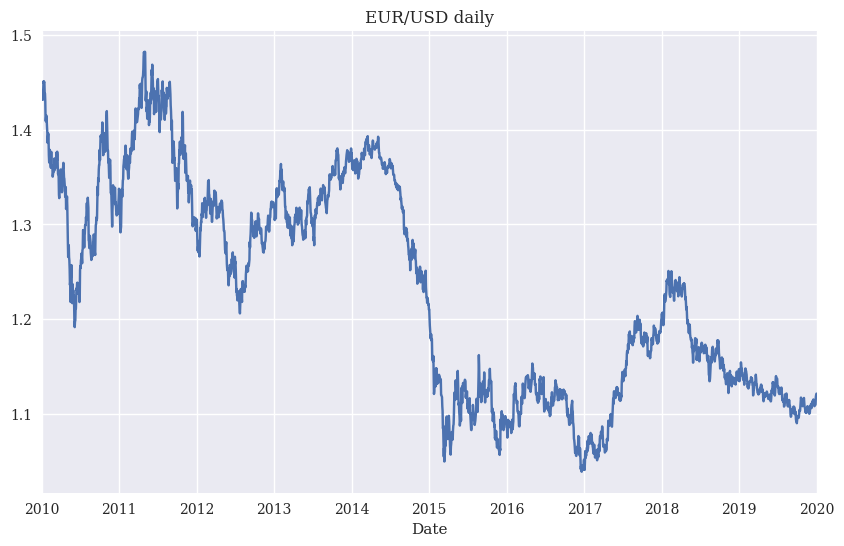

In [14]:
raw.plot(figsize=(10, 6), title='EUR/USD daily');

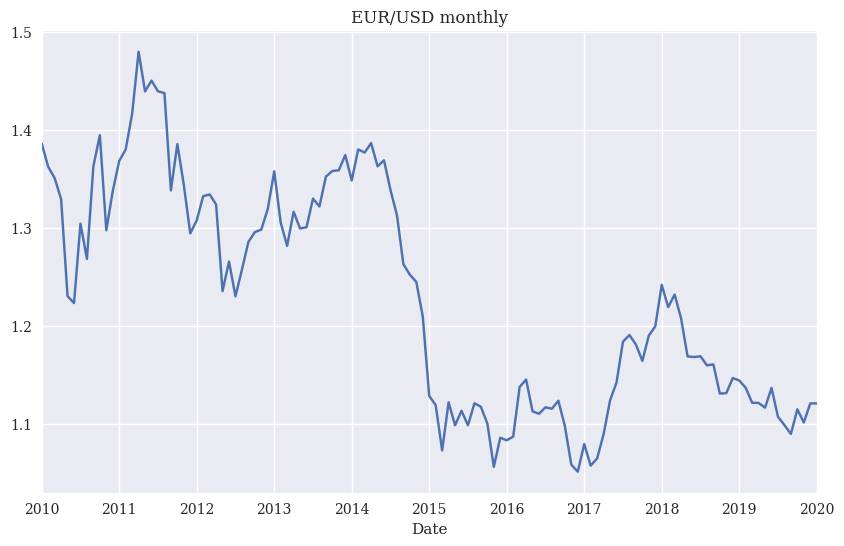

In [8]:
l.plot(figsize=(10, 6), title='EUR/USD monthly');

In [16]:
len(l)

121

In [21]:
l = l.values
l -= l.mean()

In [22]:
f = np.linspace(-2, 2, len(l))

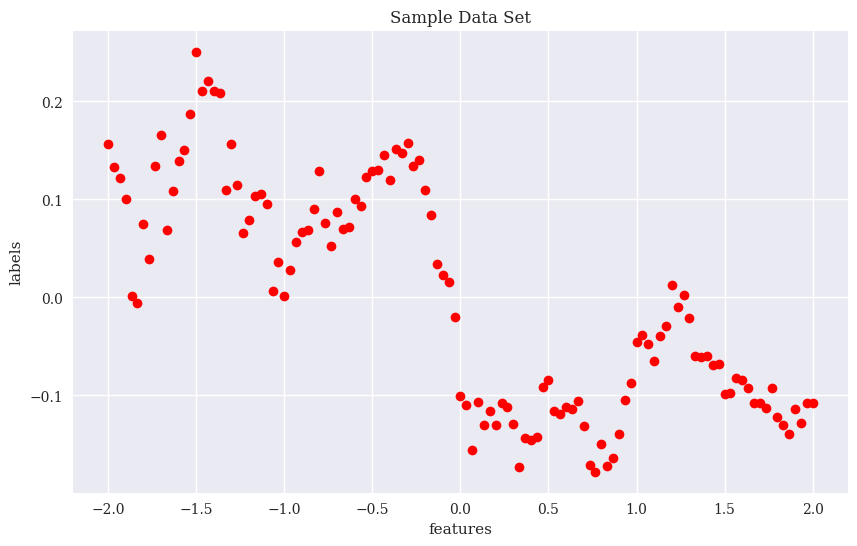

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(f, l, 'ro')
plt.title('Sample Data Set')
plt.xlabel('features')
plt.ylabel('labels');

## Success

In [26]:
def MSE(l, p):
    return np.mean((l - p) ** 2)

In [27]:
reg = np.polyfit(f, l, deg=5)
reg

array([-0.01910626, -0.0147182 ,  0.10990388,  0.06007211, -0.20833598,
       -0.03275423])

In [28]:
p = np.polyval(reg, f)

In [29]:
MSE(l, p)

0.0034166422957371025

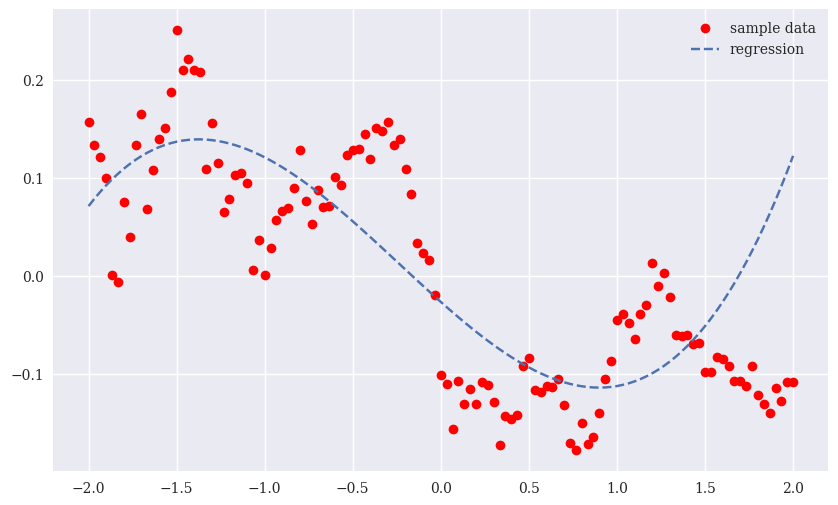

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(f, l, 'ro', label='sample data')
plt.plot(f, p, '--', label='regression')
plt.legend();

 10 | MSE=248628.1068156043
 30 | MSE=731.9382249304597
 50 | MSE=12.236088505004368
 70 | MSE=0.7410590619743285
 90 | MSE=0.005743061730409317
110 | MSE=0.006492800939555572
CPU times: user 34.6 ms, sys: 4.07 ms, total: 38.7 ms
Wall time: 36.1 ms


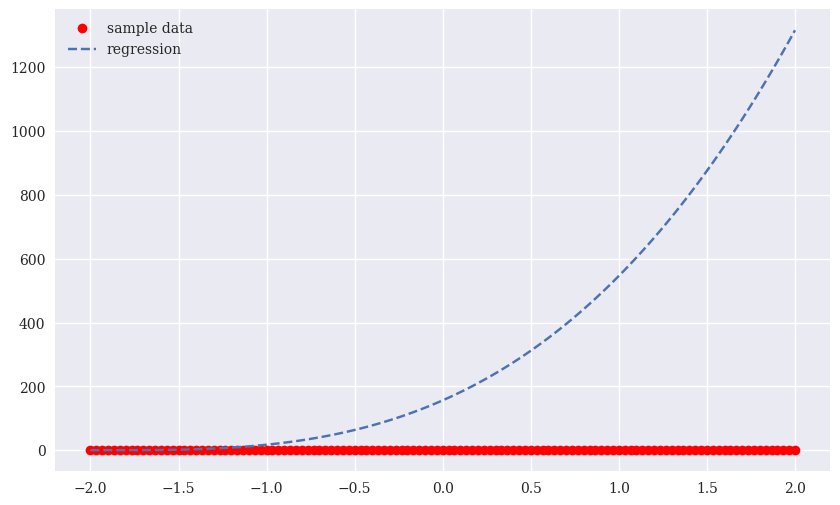

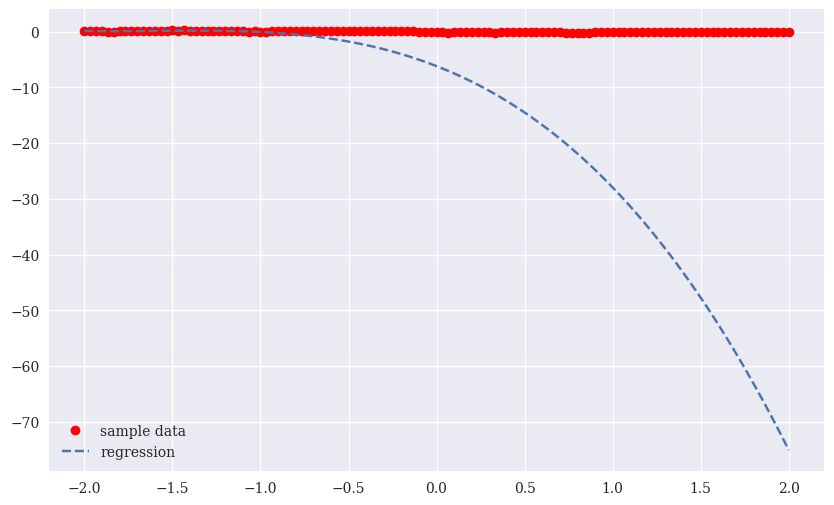

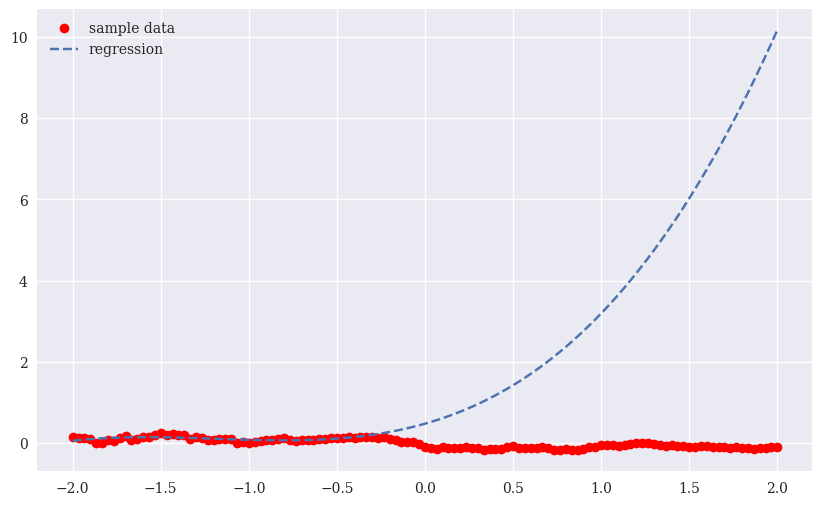

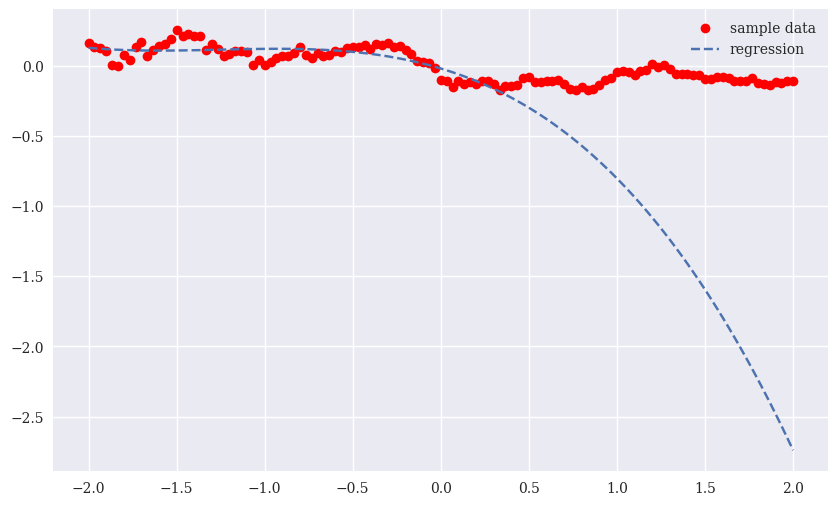

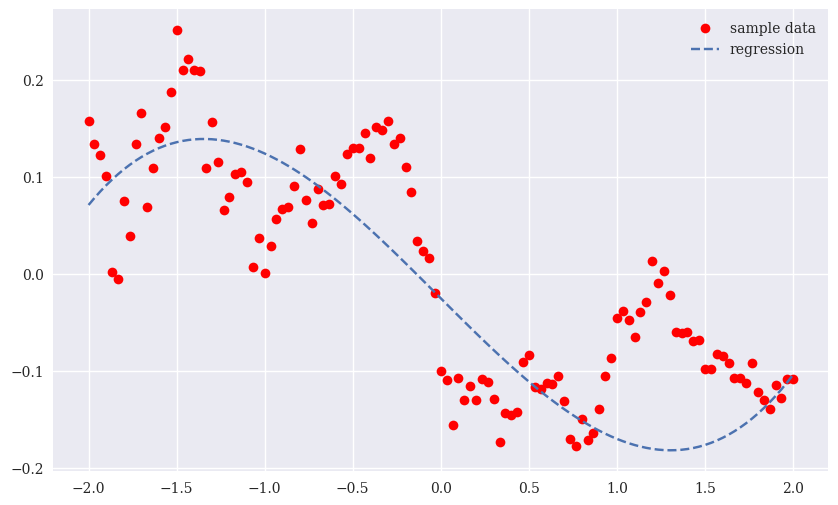

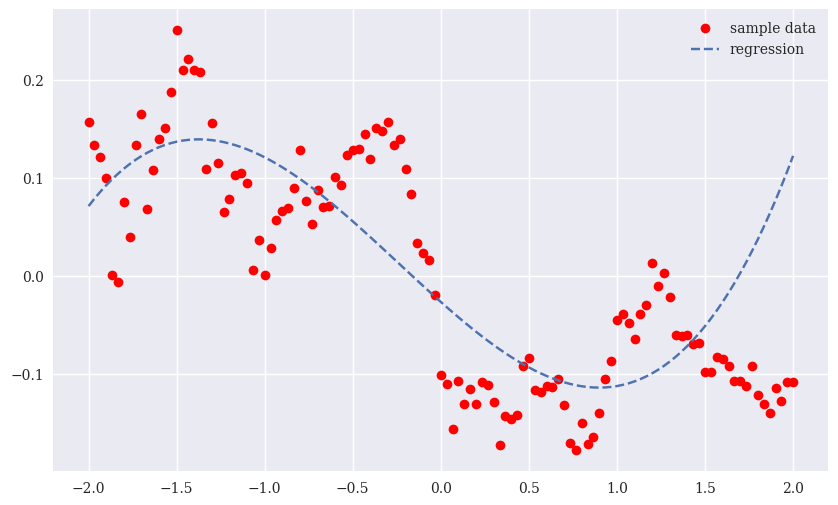

In [37]:
%%time
for i in range(10, len(f) + 1, 20):
    reg = np.polyfit(f[:i], l[:i], deg=3)
    p =  np.polyval(reg, f)
    mse = MSE(l, p)
    print(f'{i:3d} | MSE={mse}')
    plt.figure(figsize=(10, 6))
    plt.plt(f, l, 'ro', label='sample data')
    plt.plot(f, p, '--', label='regression')
    plt.legend();

In [40]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '6'

In [39]:
import tensorflow as tf
from tensorflow import keras 
tf.random.set_seed(100)

In [38]:
from keras.layers import Dense
from keras.models import Sequential

In [44]:
model = Sequential()  
model.add(Dense(256, activation='relu', input_dim=1))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')  ## rmsprop梯度下降结合最近的梯度

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               512       
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


In [47]:
%time hist = model.fit(f, l, epochs=1500, verbose=False)

CPU times: user 3.04 s, sys: 390 ms, total: 3.43 s
Wall time: 2.6 s


In [50]:
p = model.predict(f).flatten()

4/4 [==============================] - 0s 606us/step


In [51]:
p

array([ 0.0983929 ,  0.10477331,  0.11115362,  0.11753404,  0.12391438,
        0.13029471,  0.13667512,  0.14305544,  0.14943576,  0.15581614,
        0.16219652,  0.16857682,  0.1749572 ,  0.18133754,  0.1877179 ,
        0.19409811,  0.2003763 ,  0.19481094,  0.1833049 ,  0.17179887,
        0.16029282,  0.14878815,  0.13728353,  0.12577893,  0.11427435,
        0.10276973,  0.09126468,  0.07975943,  0.06825423,  0.05675767,
        0.04917507,  0.05399188,  0.05880869,  0.06362551,  0.06844231,
        0.07325913,  0.07807593,  0.08289276,  0.08770956,  0.09252638,
        0.09734318,  0.10215999,  0.10697679,  0.11179362,  0.11661042,
        0.12142266,  0.1262058 ,  0.1309739 ,  0.13574204,  0.14050849,
        0.14512207,  0.14575921,  0.13551526,  0.12031226,  0.09465315,
        0.0689835 ,  0.04331304,  0.01764241, -0.00802823, -0.03369887,
       -0.05936952, -0.08504015, -0.11065927, -0.11358249, -0.11554785,
       -0.11751321, -0.11947858, -0.12144393, -0.12340929, -0.12

In [53]:
MSE(l, p)

0.0010774852835931585

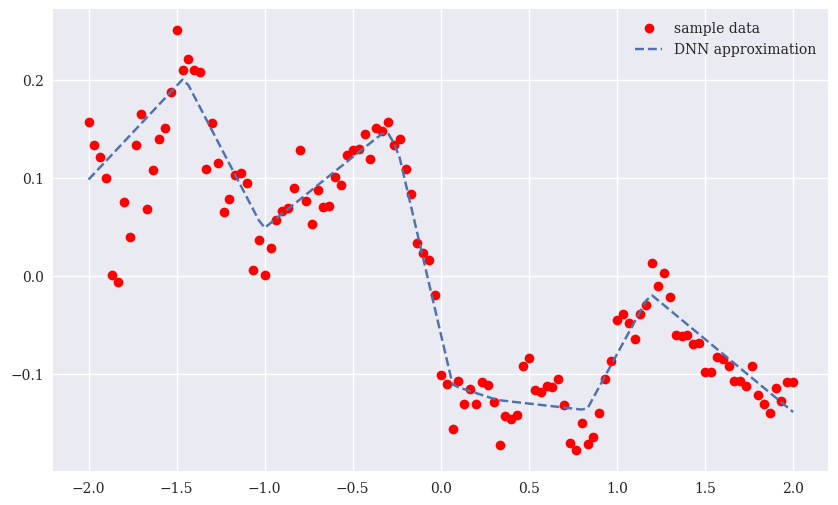

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(f, l, 'ro', label='sample data')
plt.plot(f, p, '--', label='DNN approximation')
plt.legend();

In [56]:
import pandas as pd

In [57]:
res = pd.DataFrame(hist.history)

In [59]:
res.tail()

,loss
1495,0.000997
1496,0.001293
1497,0.001572
1498,0.001230
1499,0.001309


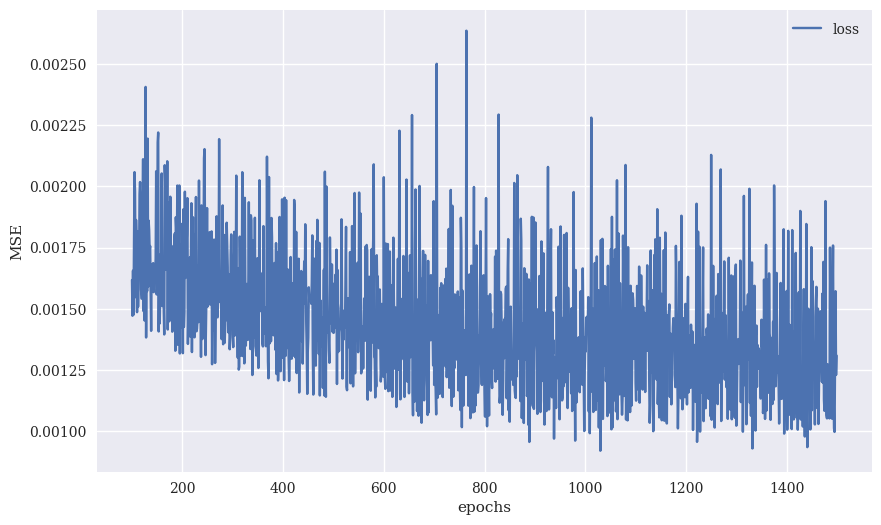

In [63]:
res.iloc[100:].plot(figsize=(10, 6))
plt.ylabel('MSE')
plt.xlabel('epochs');

## Capacity

In [73]:
reg = {}
for d in range(1, 12, 2):
    reg[d] = np.polyfit(f, l, deg=d)
    p = np.polyval(reg[d], f)
    mse = MSE(l, p)
    print(f'{d:2d} | MSE={mse}')

 1 | MSE=0.005322474034260403
 3 | MSE=0.004353110724143182
 5 | MSE=0.0034166422957371025
 7 | MSE=0.0027389501772354
 9 | MSE=0.0014119616263308418
11 | MSE=0.0012651237868752329


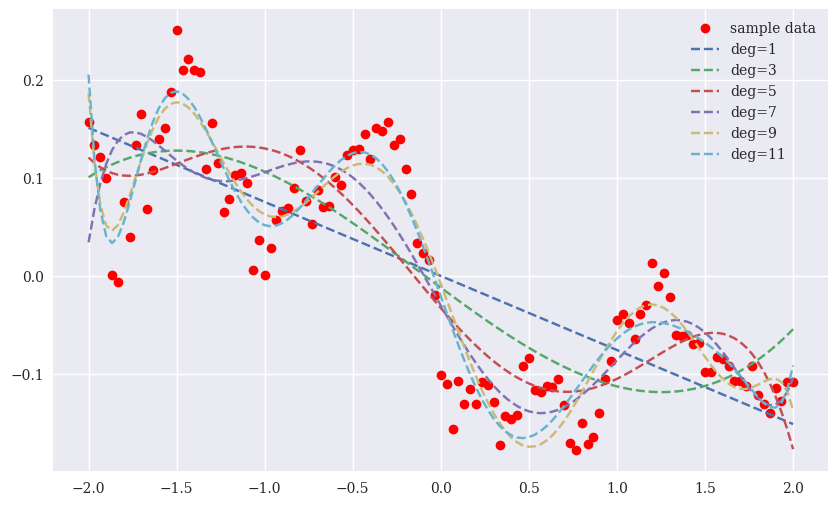

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(f, l, 'ro', label='sample data')
for d in reg:
    p = np.polyval(reg[d], f)
    plt.plot(f, p, '--', label=f'deg={d}')
plt.legend();

In [76]:
def create_dnn_model(hl=1, hu=256):
    ''' Function to create Keras DNN model.
    
    Parameters
    ==========
    hl: int
        number of hidden layers
    hu: int
        number of hidden units (per layer)
    '''
    model = Sequential()
    for _ in range(hl):
        model.add(Dense(hu, activation='relu', input_dim=1)) ### input_dim会被自动根据上一层维度进行修正
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer='rmsprop')
    return model

In [81]:
model = create_dnn_model(3)

In [82]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 256)               512       
                                                                 
 dense_15 (Dense)            (None, 256)               65792     
                                                                 
 dense_16 (Dense)            (None, 256)               65792     
                                                                 
 dense_17 (Dense)            (None, 1)                 257       
                                                                 
Total params: 132,353
Trainable params: 132,353
Non-trainable params: 0
_________________________________________________________________


In [83]:
%time model.fit(f, l, epochs=2500, verbose=False)

CPU times: user 16.2 s, sys: 4.96 s, total: 21.1 s
Wall time: 12.9 s


In [84]:
p = model.predict(f).flatten()

4/4 [==============================] - 0s 1ms/step


In [85]:
MSE(l, p)

0.0004655084520818078

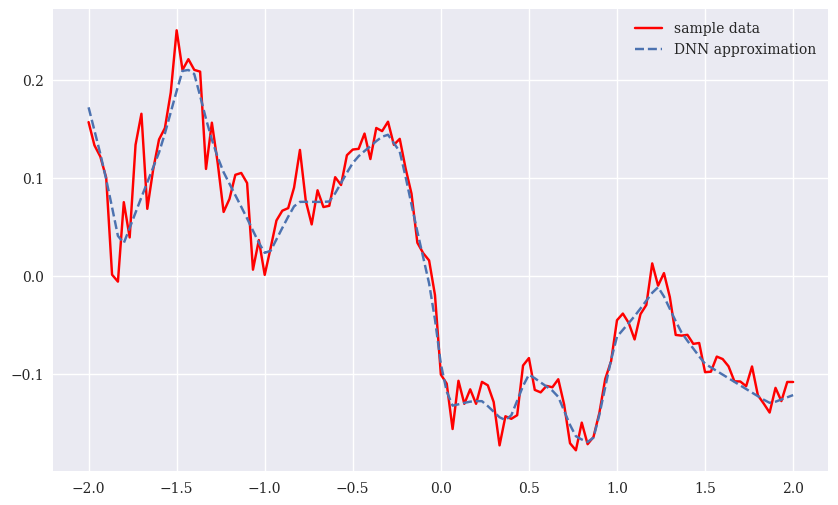

In [86]:
plt.figure(figsize=(10, 6))
plt.plot(f, l, 'r', label='sample data')
plt.plot(f, p, '--', label='DNN approximation')
plt.legend();

## Evaluation

In [87]:
te = int(0.25 * len(f))
va = int(0.25 * len(f))

In [88]:
te
va

30

In [90]:
np.random.seed(100)
ind = np.arange(len(f))
np.random.shuffle(ind)
ind

array([ 70, 115,  37,  46,  99,  26, 104, 102,  21,  33,  11,  69, 107,
        25,  32,  62,  54, 111,  29,  45,  28,  92,  91,  43,  35, 108,
        82,  96,  36,  77,  22,  51,  85,   5,  68,  23, 101, 117,  20,
        41,   6,   3,  75,  12,  57,   0,  80,  76,  84,  73,  40,  50,
        88,  81, 116,  78,  42,  90, 120,  17, 113,  74, 105,  72,  64,
        18,  44,  38,  39,  89, 114,  30,  56, 112, 109,  63,  19,  95,
        71,  55, 106,  61,  65,  47,  49,   7, 118,  59,  97,  83,  13,
         1,  31,   4,  27,   2,  86,  93,   9,  16,  58,  60, 100,  15,
       119,  34,  14, 110,  66,  53,  98,  52,  94,  10,  48,  79,  87,
       103,  67,  24,   8])

In [91]:
ind_te = np.sort(ind[:te])
ind_va = np.sort(ind[te:te + va])
ind_tr = np.sort(ind[te + va:])

In [93]:
ind_te

array([ 11,  21,  25,  26,  28,  29,  32,  33,  35,  36,  37,  43,  45,
        46,  54,  62,  69,  70,  77,  82,  91,  92,  96,  99, 102, 104,
       107, 108, 111, 115])

In [94]:
ind_va

array([  0,   3,   5,   6,  12,  17,  20,  22,  23,  40,  41,  42,  50,
        51,  57,  68,  73,  75,  76,  78,  80,  81,  84,  85,  88,  90,
       101, 116, 117, 120])

In [95]:
ind_tr

array([  1,   2,   4,   7,   8,   9,  10,  13,  14,  15,  16,  18,  19,
        24,  27,  30,  31,  34,  38,  39,  44,  47,  48,  49,  52,  53,
        55,  56,  58,  59,  60,  61,  63,  64,  65,  66,  67,  71,  72,
        74,  79,  83,  86,  87,  89,  93,  94,  95,  97,  98, 100, 103,
       105, 106, 109, 110, 112, 113, 114, 118, 119])

In [96]:
f_te = f[ind_te]
f_va = f[ind_va]
f_tr = f[ind_tr]

In [97]:
l_te = l[ind_te]
l_va = l[ind_va]
l_tr = l[ind_tr]

In [98]:
reg = {}
mse = {}
for d in range(1, 22, 4):
    reg[d] = np.polyfit(f_tr, l_tr, deg=d)
    p = np.polyval(reg[d], f_tr)
    mse_tr = MSE(l_tr, p)
    p = np.polyval(reg[d], f_va)
    mse_va = MSE(l_va, p)
    mse[d] = (mse_tr, mse_va)
    print(f'{d:2d} | MSE_tr={mse_tr:7.5f} | MSE_va={mse_va:7.5f}')

 1 | MSE_tr=0.00574 | MSE_va=0.00492
 5 | MSE_tr=0.00375 | MSE_va=0.00273
 9 | MSE_tr=0.00132 | MSE_va=0.00243
13 | MSE_tr=0.00094 | MSE_va=0.00183
17 | MSE_tr=0.00060 | MSE_va=0.00153
21 | MSE_tr=0.00046 | MSE_va=0.00837


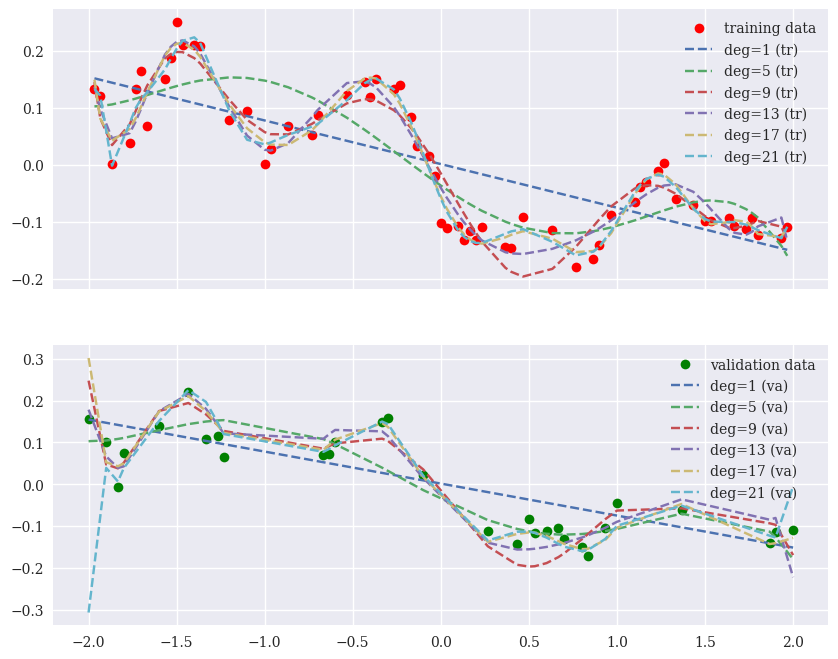

In [103]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
ax[0].plot(f_tr, l_tr, 'ro', label='training data')
ax[1].plot(f_va, l_va, 'go', label='validation data')
for d in reg:
    p = np.polyval(reg[d], f_tr)
    ax[0].plot(f_tr, p, '--', label=f'deg={d} (tr)')
    p = np.polyval(reg[d], f_va)
    plt.plot(f_va, p, '--', label=f'deg={d} (va)') ## plt.plot与ax[1].plot效果相同
ax[0].legend()
ax[1].legend();

In [104]:
from keras.callbacks import EarlyStopping

In [105]:
model = create_dnn_model(2, 256)

In [132]:
callbacks = [EarlyStopping(monitor='loss',
                           patience=100,
                          restore_best_weights=True)] ##此处应该监控验证资料的loss，寻找最小的验证资料loss，最小处为最佳参数

In [133]:
%%time
hist = model.fit(f_tr, l_tr, epochs=3000, verbose=True,
          validation_data=(f_va, l_va),
          callbacks=callbacks)

Epoch 1/3000
2/2 [==============================] - 0s 23ms/step - loss: 8.6963e-04 - val_loss: 0.0015
Epoch 2/3000
2/2 [==============================] - 0s 13ms/step - loss: 8.6091e-04 - val_loss: 0.0016
Epoch 3/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - val_loss: 0.0015
Epoch 4/3000
2/2 [==============================] - 0s 12ms/step - loss: 9.0826e-04 - val_loss: 0.0015
Epoch 5/3000
2/2 [==============================] - 0s 13ms/step - loss: 8.3038e-04 - val_loss: 0.0014
Epoch 6/3000
2/2 [==============================] - 0s 12ms/step - loss: 8.6929e-04 - val_loss: 0.0013
Epoch 7/3000
2/2 [==============================] - 0s 13ms/step - loss: 9.1065e-04 - val_loss: 0.0013
Epoch 8/3000
2/2 [==============================] - 0s 11ms/step - loss: 8.3958e-04 - val_loss: 0.0015
Epoch 9/3000
2/2 [==============================] - 0s 12ms/step - loss: 9.8521e-04 - val_loss: 0.0016
Epoch 10/3000
2/2 [==============================] - 0s 13ms/step - loss: 9.4

1/1 [==============================] - 0s 8ms/step


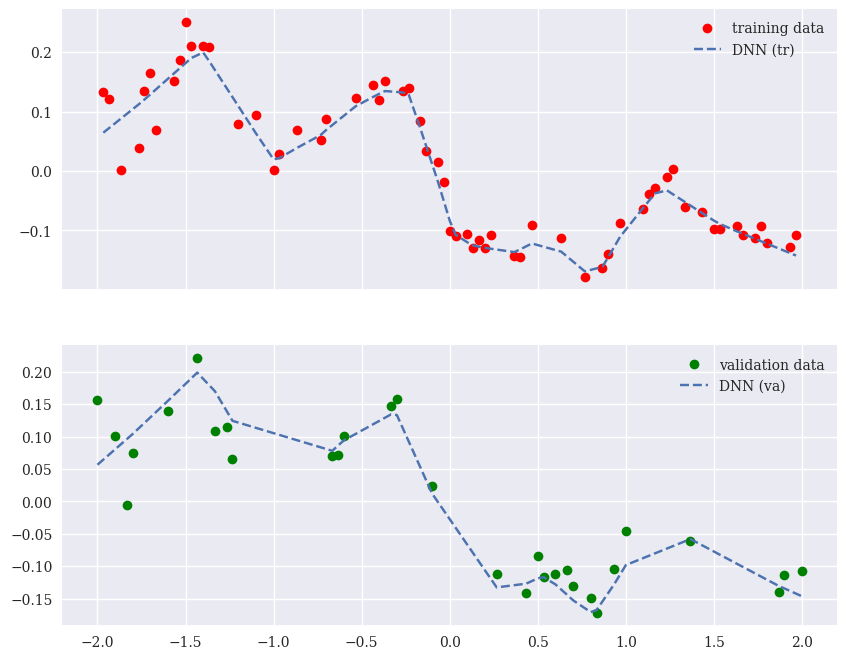

In [135]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 8))
ax[0].plot(f_tr, l_tr, 'ro', label='training data')
p = model.predict(f_tr)
ax[0].plot(f_tr, p, '--', label=f'DNN (tr)')
ax[0].legend()
ax[1].plot(f_va, l_va, 'go', label='validation data')
p = model.predict(f_va)
ax[1].plot(f_va, p, '--', label=f'DNN (va)')
ax[1].legend();

In [136]:
res = pd.DataFrame(hist.history)

In [137]:
res.tail()

,loss,val_loss
178,0.001190,0.001889
179,0.001216,0.001519
180,0.000805,0.001342
181,0.000773,0.001576
182,0.001016,0.001698


In [138]:
res['loss'].argmin()

82

In [139]:
res

,loss,val_loss
0,0.000870,0.001456
1,0.000861,0.001558
2,0.001008,0.001450
3,0.000908,0.001471
4,0.000830,0.001357
...,...,...
178,0.001190,0.001889
179,0.001216,0.001519
180,0.000805,0.001342
181,0.000773,0.001576


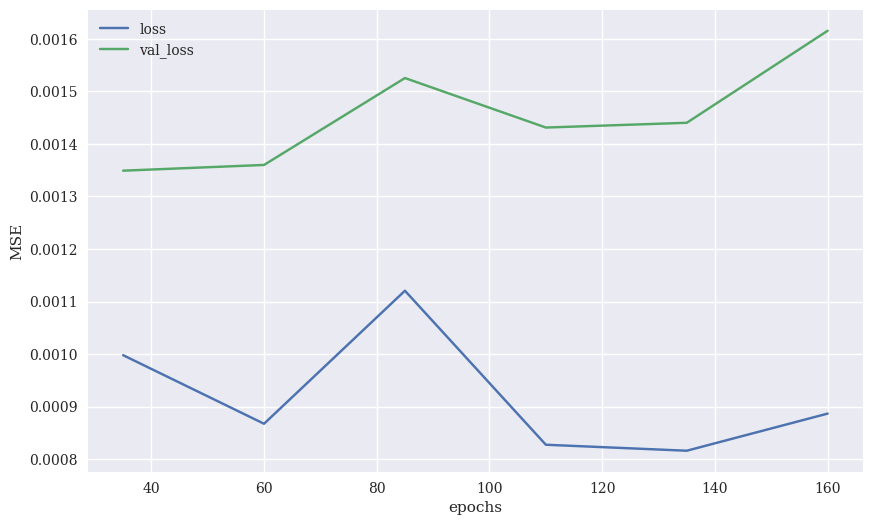

In [141]:
res.iloc[35::25].plot(figsize=(10, 6))
plt.ylabel('MSE')
plt.xlabel('epochs');

In [142]:
p_ols = np.polyval(reg[5], f_te)
p_dnn = model.predict(f_te).flatten()

1/1 [==============================] - 0s 10ms/step


In [143]:
MSE(l_te, p_ols)

0.0038960346771028343

In [144]:
MSE(l_te, p_dnn)

0.0008038624950870535

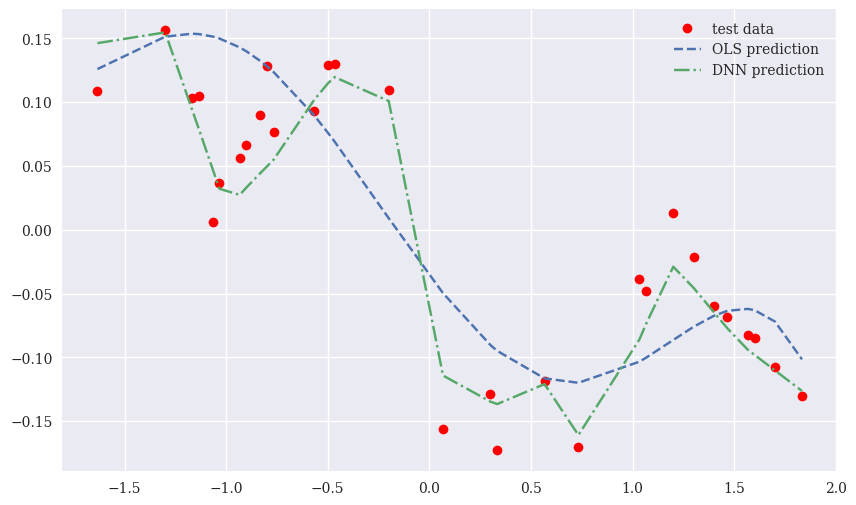

In [145]:
plt.figure(figsize=(10, 6))
plt.plot(f_te, l_te, 'ro', label='test data')
plt.plot(f_te, p_ols, '--', label='OLS prediction')
plt.plot(f_te, p_dnn, '-.', label='DNN prediction');
plt.legend();

## Bias & Variance

In [146]:
f_tr = f[:20:2]
l_tr = l[:20:2]

In [147]:
f_va = f[1:20:2]
l_va = l[1:20:2]

In [153]:
reg_b = np.polyfit(f_tr, l_tr, deg=1)

In [157]:
reg_v = np.polyfit(f_tr, l_tr, deg=9, full=True)[0]

In [158]:
f_ = np.linspace(f_tr.min(), f_va.max(), 75)

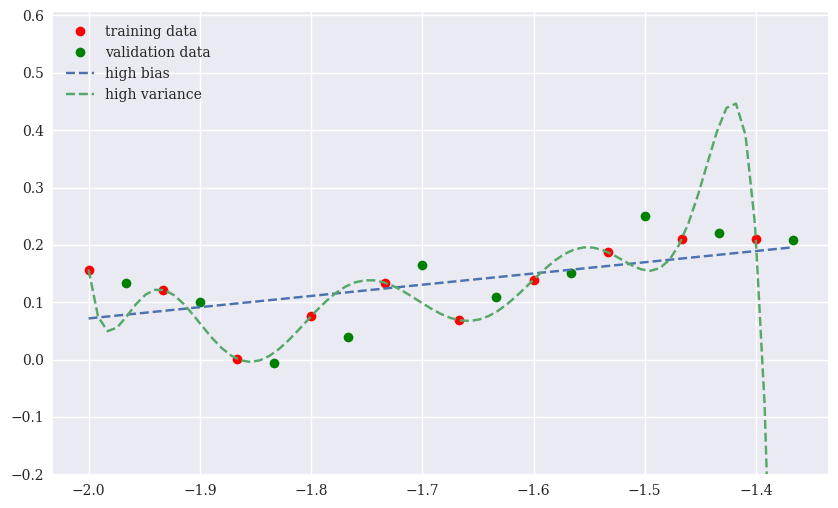

In [167]:
plt.figure(figsize=(10, 6))
plt.plot(f_tr, l_tr, 'ro', label='training data')
plt.plot(f_va, l_va, 'go', label='validation data')
plt.plot(f_, np.polyval(reg_b, f_), '--', label='high bias')
plt.plot(f_, np.polyval(reg_v, f_), '--', label='high variance')
plt.ylim(-0.2)
plt.legend(loc=2);

In [161]:
from sklearn.metrics import r2_score

In [162]:
def evaluate(reg, f, l):
    p = np.polyval(reg, f)
    bias = np.abs(l - p).mean()
    var = p.var()
    msg = f'MSE={MSE(l, p):.4f} | R2={r2_score(l, p):9.4f} | '
    msg += f'bias={bias:.4f} | var={var:.4f}'
    print(msg)

In [168]:
evaluate(reg_b, f_tr, l_tr)

MSE=0.0026 | R2=   0.3484 | bias=0.0423 | var=0.0014


In [169]:
evaluate(reg_b, f_va, l_va)

MSE=0.0032 | R2=   0.4498 | bias=0.0460 | var=0.0014


In [170]:
evaluate(reg_v, f_tr, l_tr)

MSE=0.0000 | R2=   1.0000 | bias=0.0000 | var=0.0040


In [171]:
evaluate(reg_v, f_va, l_va)

MSE=0.8752 | R2=-149.2713 | bias=0.3565 | var=0.7539


## Cross-Validation

In [188]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [189]:
def PolynomialRegression(degree=None, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))

In [190]:
np.set_printoptions(suppress=True,
        formatter={'float': lambda x: f'{x:12.2f}'})

In [191]:
print('\nCross-validation scores')
print(74 * '=')
for deg in range(0, 10, 1):
    model = PolynomialRegression(deg)
    cvs = cross_val_score(model, f.reshape(-1, 1), l, cv=5)
    print(f'deg={deg} | ' + str(cvs.round(2)))


Cross-validation scores
deg=0 | [       -6.07        -7.34        -0.09        -6.32        -8.69]
deg=1 | [       -0.28        -1.40         0.16        -1.66        -4.62]
deg=2 | [       -3.48        -2.45         0.19        -1.57       -12.94]
deg=3 | [       -0.00        -1.24         0.32        -0.48       -43.62]
deg=4 | [     -222.81        -2.88         0.37        -0.32      -496.61]
deg=5 | [     -143.67        -5.85         0.49         0.12     -1241.04]
deg=6 | [    -4038.96       -14.71         0.49        -0.33      -317.32]
deg=7 | [    -9937.83       -13.98         0.64         0.22    -18725.61]
deg=8 | [    -3514.36       -11.22        -0.15        -6.29   -298744.18]
deg=9 | [    -7454.15        -0.91         0.15        -0.41    -13580.75]


In [193]:
np.random.seed(100)
tf.random.set_seed(100)
from keras.wrappers.scikit_learn import KerasRegressor
# from scikeras.wrappers import KerasRegressor

In [194]:
model = KerasRegressor(model=create_dnn_model,
                      verbose=False, epochs=1000,
                      hl=1, hu=36)

/var/folders/dv/ly5hp_ms3bd9753868lg6c5w0000gn/T/ipykernel_66511/2848844435.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(model=create_dnn_model,


AttributeError: 'KerasRegressor' object has no attribute '__call__'

In [195]:
%time cross_val_score(model, f.reshape(-1, 1), l, cv=5)

CPU times: user 5.78 ms, sys: 926 µs, total: 6.71 ms
Wall time: 6.1 ms


array([    -7454.15,        -0.91,         0.15,        -0.41,
          -13580.75])

In [196]:
model = KerasRegressor(model=create_dnn_model,
                      verbose=False, epochs=1000,
                      hl=3, hu=256)

/var/folders/dv/ly5hp_ms3bd9753868lg6c5w0000gn/T/ipykernel_66511/3525082472.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(model=create_dnn_model,


AttributeError: 'KerasRegressor' object has no attribute '__call__'

In [197]:
%time cross_val_score(model, f.reshape(-1, 1), l, cv=5)

CPU times: user 6.59 ms, sys: 1.83 ms, total: 8.43 ms
Wall time: 6.97 ms


array([    -7454.15,        -0.91,         0.15,        -0.41,
          -13580.75])

<img src='http://hilpisch.com/taim_logo.png' width="350px" align="right">

<br><br><br><a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:ai@tpq.io">ai@tpq.io</a>